In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,LeakyReLU,BatchNormalization,Dropout,Dense,InputLayer,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [3]:
gen=ImageDataGenerator(rescale=1./255,validation_split=0.2,zoom_range=(0.99,0.99),dtype='float')

In [4]:
train=gen.flow_from_directory('../Deeplearning/Datasets/Brain Tumor Data Set/Brain Tumor Data Set',
                              target_size=(150,150),
                              batch_size=256,
                              class_mode='binary',
                              color_mode='rgb',
                              shuffle=True,
                              seed=123,
                              subset='training'
                              )

Found 3681 images belonging to 2 classes.


In [5]:
val=gen.flow_from_directory('../Deeplearning/Datasets/Brain Tumor Data Set/Brain Tumor Data Set',
                            target_size=(150,150),
                            batch_size=8,
                            class_mode='binary',
                            color_mode='rgb',
                            shuffle=True,
                            seed=123,
                            subset='validation'
                            )

Found 919 images belonging to 2 classes.


In [6]:
classes=val.class_indices

In [7]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

<Axes: >

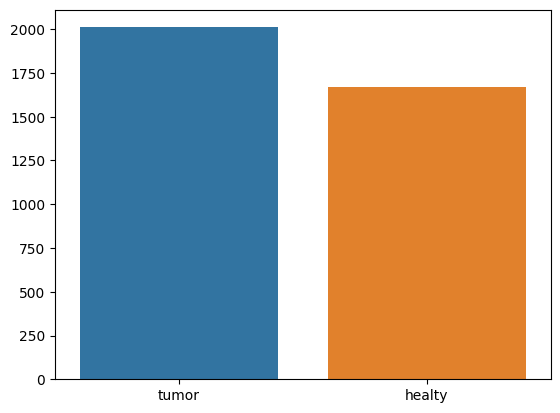

In [8]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])       

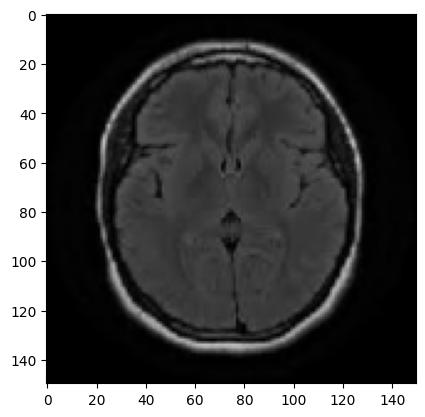

In [9]:
import matplotlib.pyplot as plt
batch=next(train)

plt.imshow(batch[0][0])

In [11]:
# input layer
model=Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation=LeakyReLU(),padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D())


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64,activation=LeakyReLU()))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1,activation='sigmoid'))


In [12]:
#compile and add optimizers
model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy'])

In [13]:
from keras import utils, callbacks

tf.keras.utils.plot_model(
    model,to_file="model.png",show_shapes=True,
    show_layer_names=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
#creating early stops
early_stops=callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=5,restore_best_weights=True)

In [15]:
#train our model
history=model.fit(train,verbose=1,callbacks=early_stops,epochs=10,validation_data=(val))

Epoch 1/10
15/15 [==============================] - 233s 14s/step - loss: 0.5852 - accuracy: 0.7006 - val_loss: 0.5699 - val_accuracy: 0.7247
Epoch 2/10
15/15 [==============================] - 105s 7s/step - loss: 0.3478 - accuracy: 0.8473 - val_loss: 0.8227 - val_accuracy: 0.5452
Epoch 3/10
15/15 [==============================] - 108s 7s/step - loss: 0.2055 - accuracy: 0.9196 - val_loss: 0.3867 - val_accuracy: 0.8063
Epoch 4/10
15/15 [==============================] - 135s 9s/step - loss: 0.1217 - accuracy: 0.9576 - val_loss: 0.1954 - val_accuracy: 0.9728
Epoch 5/10
15/15 [==============================] - 146s 10s/step - loss: 0.0766 - accuracy: 0.9802 - val_loss: 0.1857 - val_accuracy: 0.9837
Epoch 6/10
12/15 [=======================>......] - ETA: 30s - loss: 0.0428 - accuracy: 0.9906

Text(0, 0.5, 'Accuracy')

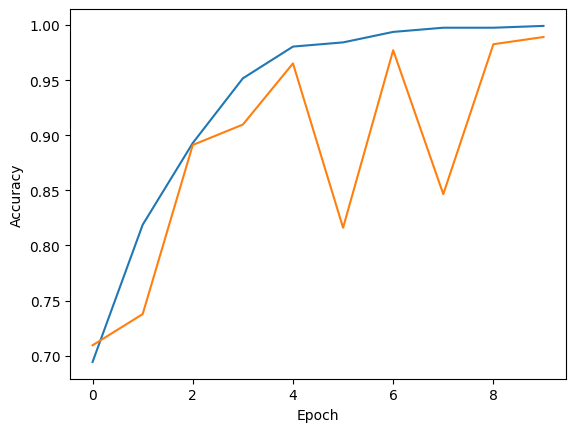

In [39]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

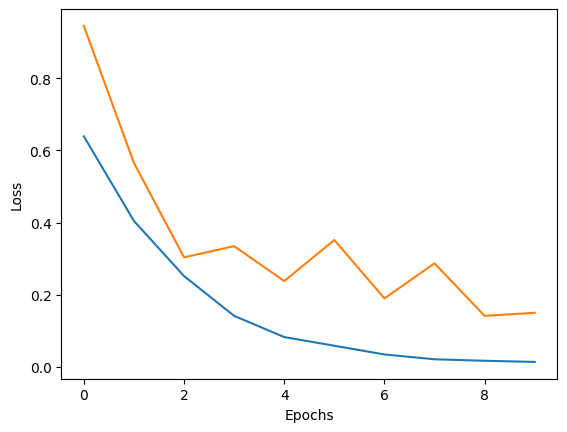

In [40]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              